# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=200)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=200)

In [5]:
# Definir a arquitetura MLP

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation_function = torch.nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        return x

In [6]:
model = MLP().to(device)
# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, weight_decay=1e-4)
loss_fn = torch.nn.CrossEntropyLoss().cuda()

print(device)
print(model)

cuda:0
MLP(
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (activation_function): ReLU()
)


In [7]:
# Realizar o treinamento aqui
def train_model(model, epochs, train_loader, losses):
    
    inputs_list = []
    labels_list = []
    for _, (inputs, labels) in enumerate(train_loader):
        inputs_list.append(inputs.to(device))
        labels_list.append(labels.to(device))

    losses = []
    for epoch in range(epochs):
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
            optimizer.zero_grad()

            y_pred = model(inputs)
            loss = loss_fn(y_pred, labels)
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
        
            running_loss += loss.item()
            if i % 250 == 249:
                print('[%d] loss: %.3f' %
                      (epoch + 1, running_loss / 250))
                running_loss = 0.0

# Trainamento do Modelo
- Ativação: ReLu
- Loss: CrossEntropy
- Hidden: 3
- Regularizador: L2
- Taxa de Aprendizado = 1e-2

In [8]:
losses = []
train_model(model, 1500, train_loader, losses)

[1] loss: 2.296
[2] loss: 2.281
[3] loss: 2.259
[4] loss: 2.227
[5] loss: 2.194
[6] loss: 2.171
[7] loss: 2.151
[8] loss: 2.131
[9] loss: 2.114
[10] loss: 2.100
[11] loss: 2.089
[12] loss: 2.079
[13] loss: 2.071
[14] loss: 2.063
[15] loss: 2.056
[16] loss: 2.049
[17] loss: 2.043
[18] loss: 2.037
[19] loss: 2.032
[20] loss: 2.026
[21] loss: 2.020
[22] loss: 2.015
[23] loss: 2.009
[24] loss: 2.004
[25] loss: 1.998
[26] loss: 1.993
[27] loss: 1.987
[28] loss: 1.981
[29] loss: 1.974
[30] loss: 1.968
[31] loss: 1.962
[32] loss: 1.956
[33] loss: 1.949
[34] loss: 1.943
[35] loss: 1.937
[36] loss: 1.931
[37] loss: 1.926
[38] loss: 1.920
[39] loss: 1.915
[40] loss: 1.909
[41] loss: 1.904
[42] loss: 1.899
[43] loss: 1.894
[44] loss: 1.889
[45] loss: 1.884
[46] loss: 1.879
[47] loss: 1.874
[48] loss: 1.869
[49] loss: 1.865
[50] loss: 1.860
[51] loss: 1.855
[52] loss: 1.850
[53] loss: 1.846
[54] loss: 1.841
[55] loss: 1.836
[56] loss: 1.832
[57] loss: 1.827
[58] loss: 1.823
[59] loss: 1.818
[60] l

[463] loss: 0.926
[464] loss: 0.929
[465] loss: 0.924
[466] loss: 0.926
[467] loss: 0.922
[468] loss: 0.914
[469] loss: 0.914
[470] loss: 0.913
[471] loss: 0.916
[472] loss: 0.911
[473] loss: 0.912
[474] loss: 0.902
[475] loss: 0.917
[476] loss: 0.909
[477] loss: 0.903
[478] loss: 0.899
[479] loss: 0.907
[480] loss: 0.895
[481] loss: 0.906
[482] loss: 0.912
[483] loss: 0.899
[484] loss: 0.887
[485] loss: 0.892
[486] loss: 0.895
[487] loss: 0.884
[488] loss: 0.902
[489] loss: 0.896
[490] loss: 0.895
[491] loss: 0.885
[492] loss: 0.896
[493] loss: 0.885
[494] loss: 0.883
[495] loss: 0.883
[496] loss: 0.876
[497] loss: 0.878
[498] loss: 0.876
[499] loss: 0.867
[500] loss: 0.877
[501] loss: 0.870
[502] loss: 0.885
[503] loss: 0.861
[504] loss: 0.873
[505] loss: 0.883
[506] loss: 0.875
[507] loss: 0.858
[508] loss: 0.859
[509] loss: 0.868
[510] loss: 0.860
[511] loss: 0.869
[512] loss: 0.863
[513] loss: 0.858
[514] loss: 0.861
[515] loss: 0.860
[516] loss: 0.856
[517] loss: 0.863
[518] loss

[919] loss: 0.490
[920] loss: 0.429
[921] loss: 0.450
[922] loss: 0.439
[923] loss: 0.484
[924] loss: 0.456
[925] loss: 0.465
[926] loss: 0.463
[927] loss: 0.449
[928] loss: 0.443
[929] loss: 0.449
[930] loss: 0.436
[931] loss: 0.449
[932] loss: 0.500
[933] loss: 0.448
[934] loss: 0.446
[935] loss: 0.435
[936] loss: 0.437
[937] loss: 0.460
[938] loss: 0.434
[939] loss: 0.449
[940] loss: 0.432
[941] loss: 0.482
[942] loss: 0.458
[943] loss: 0.437
[944] loss: 0.451
[945] loss: 0.453
[946] loss: 0.464
[947] loss: 0.460
[948] loss: 0.430
[949] loss: 0.435
[950] loss: 0.427
[951] loss: 0.424
[952] loss: 0.437
[953] loss: 0.474
[954] loss: 0.403
[955] loss: 0.418
[956] loss: 0.453
[957] loss: 0.396
[958] loss: 0.443
[959] loss: 0.440
[960] loss: 0.413
[961] loss: 0.448
[962] loss: 0.466
[963] loss: 0.464
[964] loss: 0.407
[965] loss: 0.388
[966] loss: 0.449
[967] loss: 0.401
[968] loss: 0.457
[969] loss: 0.409
[970] loss: 0.429
[971] loss: 0.436
[972] loss: 0.394
[973] loss: 0.404
[974] loss

[1355] loss: 0.138
[1356] loss: 0.138
[1357] loss: 0.261
[1358] loss: 0.204
[1359] loss: 0.364
[1360] loss: 0.341
[1361] loss: 0.338
[1362] loss: 0.143
[1363] loss: 0.138
[1364] loss: 0.387
[1365] loss: 0.143
[1366] loss: 0.408
[1367] loss: 0.241
[1368] loss: 0.159
[1369] loss: 0.260
[1370] loss: 0.140
[1371] loss: 0.136
[1372] loss: 0.135
[1373] loss: 0.210
[1374] loss: 0.135
[1375] loss: 0.133
[1376] loss: 0.334
[1377] loss: 0.433
[1378] loss: 0.342
[1379] loss: 0.139
[1380] loss: 0.134
[1381] loss: 0.132
[1382] loss: 0.687
[1383] loss: 0.471
[1384] loss: 0.434
[1385] loss: 0.232
[1386] loss: 0.328
[1387] loss: 0.142
[1388] loss: 0.136
[1389] loss: 0.134
[1390] loss: 0.132
[1391] loss: 0.133
[1392] loss: 0.180
[1393] loss: 0.256
[1394] loss: 0.397
[1395] loss: 0.137
[1396] loss: 0.244
[1397] loss: 0.131
[1398] loss: 0.229
[1399] loss: 0.318
[1400] loss: 0.132
[1401] loss: 0.129
[1402] loss: 0.284
[1403] loss: 0.219
[1404] loss: 0.131
[1405] loss: 0.127
[1406] loss: 0.126
[1407] loss:

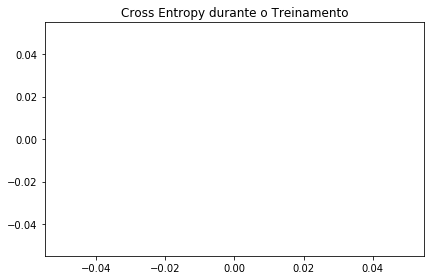

In [9]:
import matplotlib.pyplot as plt
plt.title("Cross Entropy durante o Treinamento")
plt.tight_layout()
_ = plt.plot(losses)
plt.show()

In [10]:
def one_hot(results):
    results = results.cpu().detach().numpy().tolist()[0]
    return results.index(max(results))

def evaluate(model, dataset):
    inputs_list = []
    labels_list = []
    for _, (inputs, labels) in enumerate(dataset):
        inputs_list.append(inputs.to(device))
        labels_list.append(labels.to(device))

    acuracia = 0
    results = [0,0,0,0,0,0,0,0,0,0]
    for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
        y_pred = model(inputs)

        result = one_hot(y_pred)

        if result == labels.item():
            acuracia += 1

        results[result] += 1
        
    print(acuracia / len(dataset) * 100, "%")
    print(results)

In [11]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# Avaliação do Modelo no dataset de Treino

In [12]:
evaluate(model, train_loader)

92.496 %
[5722, 4959, 4816, 4737, 5216, 4726, 5028, 4868, 5244, 4684]


# Avaliação do Modelo (conjunto de teste)

In [13]:
evaluate(model, test_loader)

42.04 %
[1344, 938, 986, 912, 1069, 913, 934, 978, 1077, 849]
